In [1]:
import pandas as pd
import tqdm
import warnings
import json
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json('data/matches.json', orient='records')

In [3]:
match_1 = pd.read_json('data/matches/2841/structured_data.json')

In [4]:
match_1

,possession,frame,data,period,time
0,"{'trackable_object': None, 'group': None}",0,[],NaN,None
1,"{'trackable_object': None, 'group': None}",1,[],NaN,None
2,"{'trackable_object': None, 'group': None}",2,[],NaN,None
3,"{'trackable_object': None, 'group': None}",3,[],NaN,None
4,"{'trackable_object': None, 'group': None}",4,[],NaN,None
...,...,...,...,...,...
68395,"{'trackable_object': None, 'group': None}",68395,[],NaN,None
68396,"{'trackable_object': None, 'group': None}",68396,[],NaN,None
68397,"{'trackable_object': None, 'group': None}",68397,[],NaN,None
68398,"{'trackable_object': None, 'group': None}",68398,[],NaN,None


In [5]:
match_1['possession'][15653]#['trackable_object']

{'trackable_object': None, 'group': None}

In [6]:
with open('data/matches/2841/structured_data.json') as file:
    match_js = json.load(file)

In [7]:
match_js

[{'possession': {'trackable_object': None, 'group': None},
  'frame': 0,
  'data': [],
  'period': None,
  'time': None},
 {'possession': {'trackable_object': None, 'group': None},
  'frame': 1,
  'data': [],
  'period': None,
  'time': None},
 {'possession': {'trackable_object': None, 'group': None},
  'frame': 2,
  'data': [],
  'period': None,
  'time': None},
 {'possession': {'trackable_object': None, 'group': None},
  'frame': 3,
  'data': [],
  'period': None,
  'time': None},
 {'possession': {'trackable_object': None, 'group': None},
  'frame': 4,
  'data': [],
  'period': None,
  'time': None},
 {'possession': {'trackable_object': None, 'group': None},
  'frame': 5,
  'data': [],
  'period': None,
  'time': None},
 {'possession': {'trackable_object': None, 'group': None},
  'frame': 6,
  'data': [],
  'period': None,
  'time': None},
 {'possession': {'trackable_object': None, 'group': None},
  'frame': 7,
  'data': [],
  'period': None,
  'time': None},
 {'possession': {'tracka

In [8]:
event = 0
events = []
for i in range(len(match_js)):
    for j in range(len(match_js[i]['data'])):
        try:
            if match_js[i]['data'][j]['trackable_object'] == 9775:
                event_id = event +1
                pos_x = match_js[i]['data'][j]['x']
                pos_y = match_js[i]['data'][j]['y']
                time = match_js[i]['time']
                track_object = 9975
                event += 1
                
                ev = {'event_id': event_id,
                      'pos_x': pos_x,
                      'pos_y':pos_y,
                      'time': time,
                      'track_object': track_object}
                events.append(ev)
            else:
                pass
        except:
            pass


In [9]:
ramos_events = pd.DataFrame(events)

<AxesSubplot:xlabel='pos_x', ylabel='pos_y'>

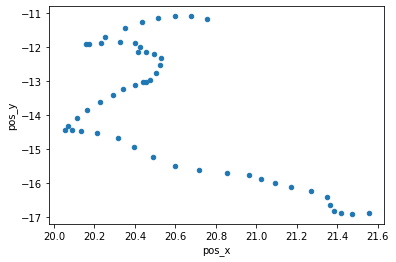

In [12]:
ramos_events.head(50).plot.scatter('pos_x','pos_y')

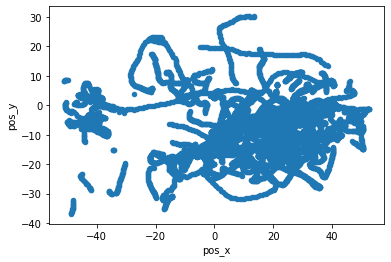

In [137]:
ramos_events.loc[ramos_events.time < '47:00.00'].plot.scatter('pos_x', 'pos_y');

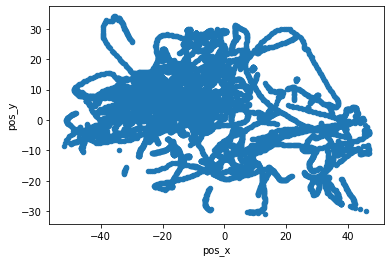

In [138]:
ramos_events.loc[ramos_events.time > '47:00.00'].plot.scatter('pos_x', 'pos_y');

In [111]:
i = 0
for i in range(len(match_js)):
    if match_js[i]['data']['trackable_object'] != 9775:
        pass
    else:
        i +=1
        print(match_js[i])
        

TypeError: list indices must be integers or slices, not str

In [67]:
with open('data/matches/2841/match_data.json') as file2:
    match_data_js = json.load(file2)

In [74]:
players = pd.DataFrame(match_data_js['players'])[['id','trackable_object','first_name','last_name','team_id']]

In [94]:
match_data_js['players'][0]['player_role']

{'acronym': 'GK', 'id': 0, 'name': 'Goalkeeper'}

In [95]:
pos = [match_data_js['players'][i]['player_role']['name'] for i in range(len(players))]
id_pos = [match_data_js['players'][i]['player_role']['id'] for i in range(len(players))]

In [96]:
players['Position'] = pos
players['id_pos'] = id_pos
players

,id,trackable_object,first_name,last_name,team_id,Position,id_pos
0,6679,6689,Marc-Andre,ter Stegen,264,Goalkeeper,0
1,11623,11712,Clément,Lenglet,264,Left Center Back,3
2,5326,5336,Jordi,Alba,264,Left Wing Back,5
3,12378,12524,Frenkie,de Jong,264,Left Midfield,9
4,9735,9745,Sergi,Roberto,264,Right Midfield,10
5,4550,4560,Ivan,Rakitic,264,Center Midfield,8
6,6450,6460,Luis,Suarez,264,Center Forward,15
7,9523,9533,Samuel,Umtiti,264,Substitute,17
8,9749,9759,Sergio,Busquets,264,Substitute,17
9,12647,12805,Carles,Alena,264,Substitute,17
